In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv("UNSW_NB15_testing-set.csv")
print("Length of training set: ", len(df))

Length of training set:  175341


In [38]:



# Set a seed for reproducibility (optional)
# np.random.seed(42)

# # Randomly select 20,000 entries
# df = df.sample(n=20000, random_state=42)


In [39]:
print(df.isna().sum())
#Prints number of empty entries for each column

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [40]:

cols_cat = df.select_dtypes('object').columns # To be explained later
cols_numeric = df._get_numeric_data().columns

In [41]:
cols_cat

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [42]:
print(cols_cat.shape)
print(cols_numeric.shape)

(4,)
(41,)


In [43]:
print("Length of training set: ", len(df))

Length of training set:  175341


In [44]:
print(df.duplicated().sum())
#Prints dupilicate rows

0


In [45]:
#Dropping the id column:
df = df.drop("id", axis = 1)

In [46]:
def removal_of_dash(data, columns):
    for col in columns:
        data[col] = np.where(data[col]=="-",'None', data[col])
    return data

In [47]:
columns = df.columns
df = removal_of_dash(df,columns)

In [48]:
df.drop(['attack_cat'], axis=1, inplace=True)
cols_cat = cols_cat.drop(['attack_cat'])

In [49]:
df_new = pd.get_dummies(df, columns = cols_cat)
# df

In [50]:
df_new

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.08749,252,254,14158.94238,8495.365234,...,0,0,0,1,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.3125,...,0,0,0,1,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.23047,...,0,0,0,1,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.62207,...,0,0,0,1,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,9e-06,2,0,114,0,111111.1072,254,0,50666664.0,0.0,...,0,0,0,0,1,0,0,0,0,0
175337,0.505762,10,8,620,354,33.612649,254,252,8826.286133,4903.492188,...,0,0,0,1,0,0,0,0,0,0
175338,9e-06,2,0,114,0,111111.1072,254,0,50666664.0,0.0,...,0,0,0,0,1,0,0,0,0,0
175339,9e-06,2,0,114,0,111111.1072,254,0,50666664.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
print(df_new.shape)

(175341, 195)


In [52]:
df.shape

(175341, 43)

In [53]:
cols_cat.shape

(3,)

In [54]:
cols_numeric = cols_numeric.drop(["id"])

In [55]:
df.describe()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341,175341,175341,175341,175341,175341,175341,175341,175341,175341,...,175341,175341,175341,175341,175341,175341,175341,175341,175341,175341
unique,74039,133,13,9,480,443,7214,6660,76991,11,...,47,32,54,4,4,11,50,52,2,2
top,9e-06,tcp,None,INT,2,0,114,0,111111.1072,254,...,1,1,1,0,0,0,1,1,0,1
freq,23031,79946,94168,82275,85200,84282,39121,84282,23012,114743,...,92793,109640,47072,172774,172774,157501,42715,42203,172579,119341


In [56]:
#EDA FROM HERE
correlation_matrix = df.corr()
print(correlation_matrix)

Empty DataFrame
Columns: []
Index: []


<ipython-input-56-e6f72a3ef387>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [57]:
def multi_corr(col1, col2="label", df=df):
    '''
    This function returns correlation between 2 given features.
    Also gives corr of the given features with "label" afetr applying log1p to it.
    '''
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])

    print("Correlation : {}\nlog_Correlation: {}".format(corr, log_corr))


In [58]:
def corr(col1, col2="label", df=df):
    """
    This function returns correlation between 2 given features
    """
    return df[[col1, col2]].corr().iloc[0,1]

In [59]:
df_for_corr = df.drop(["proto", "service", "state"], axis = 1)

In [60]:
columns_to_convert = df_for_corr.columns

# Use astype to convert each column to a numeric data type (e.g., float)
df_for_corr[columns_to_convert] = df_for_corr[columns_to_convert].astype(float)

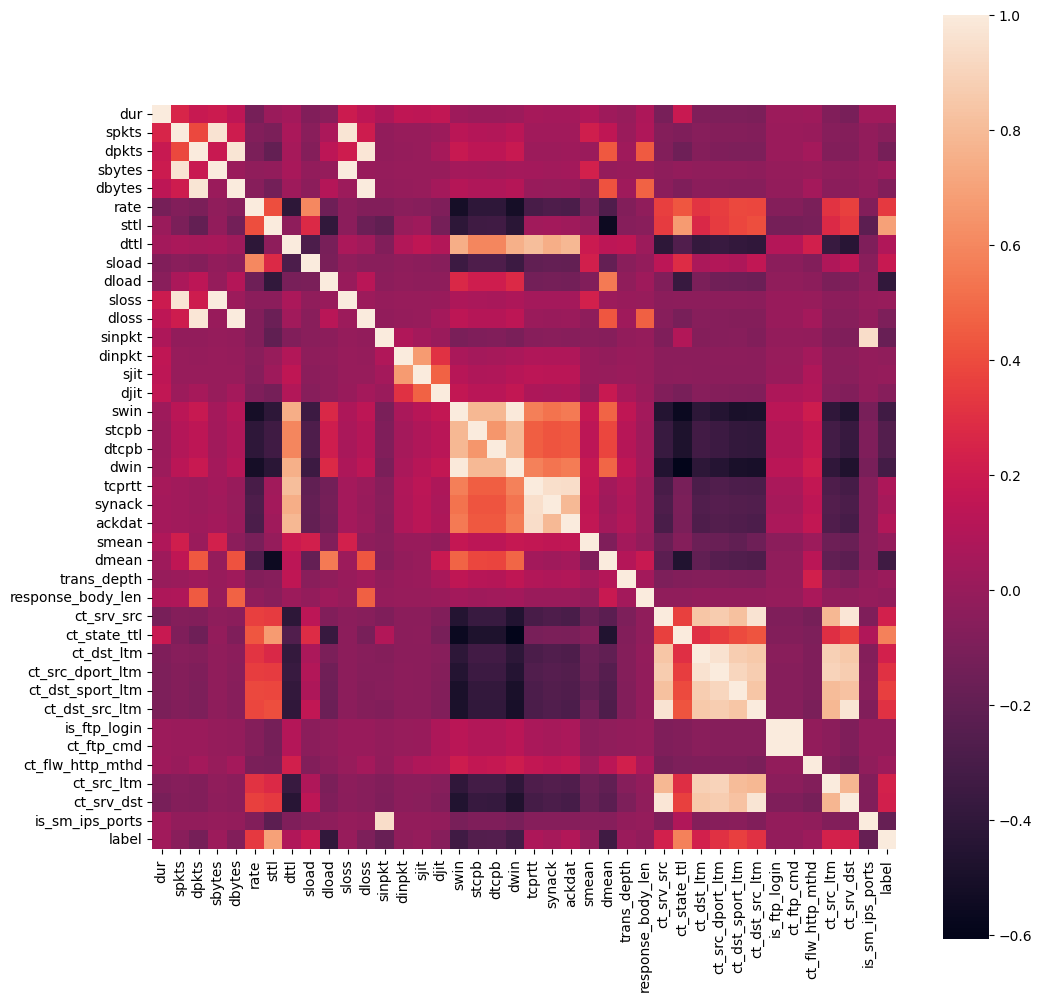

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

method = "pearson"
# correlation matrix
corr_mat = df_for_corr.corr(method=method)

plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, square=True)
plt.show()

In [62]:
limit = 0.9

columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")

spkts                sbytes               0.9637905453658627
spkts                sloss                0.9710686917738107
dpkts                dbytes               0.9719070079919281
dpkts                dloss                0.9786363765709863
sbytes               sloss                0.9961094729148002
dbytes               dloss                0.9965035947623478
sinpkt               is_sm_ips_ports      0.9413189007355157
swin                 dwin                 0.9901399299415929
tcprtt               synack               0.9494676611067603
tcprtt               ackdat               0.9417603738127356
ct_srv_src           ct_dst_src_ltm       0.9671378245460094
ct_srv_src           ct_srv_dst           0.9803230099911133
ct_dst_ltm           ct_src_dport_ltm     0.9620518416459877
ct_src_dport_ltm     ct_dst_sport_ltm     0.9067931558835277
ct_dst_src_ltm       ct_srv_dst           0.9723704538697349
is_ftp_login         ct_ftp_cmd           1.0


In [63]:
#PCA

In [64]:
X = df[cols_numeric.difference(['Index'])]

In [65]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

In [66]:
for column in X.columns:
    X[column] = pd.to_numeric(X[column], errors='coerce')

<ipython-input-66-a11896277de3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = pd.to_numeric(X[column], errors='coerce')


In [67]:
X = (X - X.mean()) / X.std()

In [68]:
X

,ackdat,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_flw_http_mthd,ct_ftp_cmd,ct_src_dport_ltm,ct_src_ltm,ct_srv_dst,ct_srv_src,...,sload,sloss,smean,spkts,stcpb,sttl,swin,synack,tcprtt,trans_depth
0,-0.503012,-0.645011,-0.554372,-0.705527,-0.189768,-0.118590,-0.544735,-0.715712,-0.753072,-0.775988,...,-0.389896,-0.075040,-0.458047,-0.104456,-0.256391,0.703837,1.092453,-0.484345,-0.521658,-0.136415
1,-0.503012,-0.645011,-0.554372,-0.614254,-0.189768,-0.118590,-0.544735,-0.715712,-0.288256,3.147657,...,-0.389927,-0.044739,-0.414075,-0.046013,0.331030,-1.141898,1.092453,-0.484345,-0.521658,-0.136415
2,0.742200,-0.520826,-0.554372,-0.522981,-0.189768,-0.118590,-0.544735,-0.595541,-0.288256,-0.215468,...,-0.389963,-0.059889,-0.443389,-0.089845,0.846256,-1.141898,1.092453,0.931745,0.888441,-0.136415
3,-0.503012,-0.520826,-0.554372,-0.522981,-0.189768,7.814893,-0.544735,-0.595541,-0.753072,-0.775988,...,-0.389957,-0.059889,-0.414075,-0.060624,0.101728,-1.141898,1.092453,-0.484345,-0.521658,-0.136415
4,0.909951,-0.520826,-0.554372,2.854106,-0.189768,-0.118590,-0.420467,-0.595541,2.779527,3.147657,...,-0.389926,-0.044739,-0.409189,-0.075234,1.082362,0.723266,1.092453,1.154995,1.096169,-0.136415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,-0.503012,2.211253,1.520466,1.393744,-0.189768,-0.118590,2.313436,2.048216,1.385080,1.372675,...,-0.120979,-0.075040,-0.389646,-0.133677,-0.715174,0.723266,-0.915405,-0.484345,-0.521658,-0.136415
175337,1.041066,-0.645011,-0.554372,-0.614254,-0.189768,-0.118590,-0.544735,-0.715712,-0.753072,-0.775988,...,-0.389925,-0.044739,-0.365218,-0.075234,1.881202,0.723266,1.092453,0.365775,0.731461,-0.136415
175338,-0.503012,-0.396640,-0.208565,0.389745,-0.189768,-0.118590,-0.296198,-0.475370,0.269523,0.251633,...,-0.120979,-0.075040,-0.389646,-0.133677,-0.715174,0.723266,-0.915405,-0.484345,-0.521658,-0.136415
175339,-0.503012,2.956366,1.693369,1.941380,-0.189768,-0.118590,3.059046,2.769240,1.942859,1.933195,...,-0.120979,-0.075040,-0.389646,-0.133677,-0.715174,0.723266,-0.915405,-0.484345,-0.521658,-0.136415


In [69]:
cov_matrix = np.cov(X, rowvar=False)

In [70]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [71]:
eigenvalues

array([ 1.00575379e+01,  3.90395063e+00,  3.66098724e+00,  3.07004363e+00,
        2.54623677e+00,  2.12840718e+00,  1.99469831e+00,  1.85150449e+00,
        1.17656860e+00,  1.18784651e+00,  9.38512694e-01,  8.70592921e-01,
        7.72308180e-01,  7.31752569e-01,  6.99569569e-01,  6.85992638e-01,
        5.74458986e-01,  4.53498439e-01,  3.59152076e-01,  3.49879182e-01,
        2.95423256e-01,  2.82975266e-01,  2.75013421e-01,  2.36787542e-01,
        2.08638626e-01,  1.74972834e-01,  1.60921765e-01,  1.01429662e-01,
        9.66230734e-02,  5.16693392e-02,  3.46448261e-02,  2.25684223e-02,
        1.78808972e-02,  1.25314870e-02,  6.42043596e-03,  5.55822015e-03,
        8.38832256e-04,  1.60358759e-03, -7.10272191e-16,  1.46175593e-17])

In [72]:
eigenvectors

array([[ 1.74478165e-01,  2.12303727e-01,  2.65285000e-01, ...,
         5.18325817e-06, -4.07464550e-01,  4.11853888e-02],
       [-2.42330410e-01, -5.68468240e-02,  2.29011376e-01, ...,
         1.92607610e-03,  6.73125305e-15, -6.30205342e-16],
       [-2.53285765e-01, -2.54842126e-02,  2.10066440e-01, ...,
        -3.31681221e-04, -1.91233934e-15,  1.90998249e-18],
       ...,
       [ 1.68438873e-01,  2.12495405e-01,  2.62538133e-01, ...,
         1.46213887e-03, -4.36570332e-01,  4.41273207e-02],
       [ 1.81184192e-01,  2.24587434e-01,  2.79000865e-01, ...,
         8.02309749e-04,  7.98243379e-01, -8.06842311e-02],
       [ 4.82171991e-02,  1.04791580e-02,  4.95154113e-02, ...,
         6.50938504e-04, -1.35444304e-16, -9.50581279e-17]])

In [73]:
cov_matrix

array([[ 1.        , -0.27832605, -0.2710922 , ...,  0.78862306,
         0.94176037,  0.1025765 ],
       [-0.27832605,  1.        ,  0.87064444, ..., -0.26457748,
        -0.28677304, -0.06921631],
       [-0.2710922 ,  0.87064444,  1.        , ..., -0.26055956,
        -0.28088305, -0.0738936 ],
       ...,
       [ 0.78862306, -0.26457748, -0.26055956, ...,  1.        ,
         0.94946766,  0.08768818],
       [ 0.94176037, -0.28677304, -0.28088305, ...,  0.94946766,
         1.        ,  0.10031821],
       [ 0.1025765 , -0.06921631, -0.0738936 , ...,  0.08768818,
         0.10031821,  1.        ]])

In [74]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [75]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

In [76]:
# Apply Bartlett's test for suitability of PCA
# Compute the chi-square statistic
chi_square = -np.log(np.prod(1 - explained_variance_ratio))


In [77]:
num_features = len(X.columns)
degrees_of_freedom = (num_features * (num_features - 1)) / 2

In [78]:
degrees_of_freedom

780.0

In [79]:
!pip install factor_analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 43.6 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=10ca659e7b8cf8e876de896550c9f662cd71856452a23f0724714ab6a78bad28
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


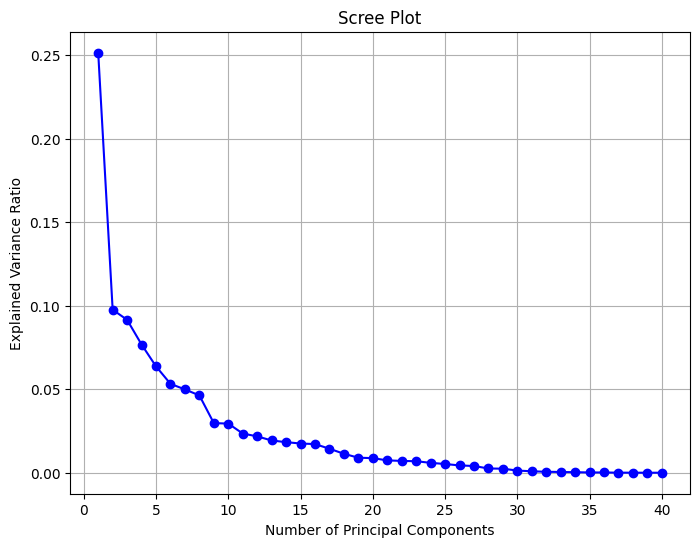

In [80]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [81]:
y = df_new.label
X_2= df_new
X_2 =X_2.drop(['label'], axis = 1)

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size = 0.2, random_state = 0)

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 7)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [85]:
# Levene's Test
import pandas as pd
import numpy as np
import scipy.stats as stats

# Load the UNSW-NB15 dataset
df_lol = pd.read_csv("UNSW_NB15_testing-set.csv")

# Get the list of all numeric features (exclude non-numeric columns)
numeric_features = df_lol.select_dtypes(include=[np.number]).columns

# Set the significance level
alpha = 0.05

# Create an empty list to store the results
results = []

# Iterate through each numeric feature
for feature in numeric_features:
    # Choose the feature you want to test
    feature_to_test = df_lol[feature].values

    # Create empty lists to store the values for each attack category
    group_values = []

    # Collect the values for each attack category
    for attack_category in df_lol['attack_cat'].unique():
        class_indices = (df_lol['attack_cat'] == attack_category)
        class_feature = feature_to_test[class_indices]
        group_values.append(class_feature)

    # Perform Levene's test
    test_statistic, p_value = stats.levene(*group_values)



    # Store the results
    results.append((feature, test_statistic, p_value))

# Display the results
for result in results:
    print(f"Feature: {result[0]}")
    print(f"Levene's Test Statistic: {result[1]}")
    print(f"p-value: {result[2]}")
    print("\n")


Feature: id
Levene's Test Statistic: 1493.3886586205676
p-value: 0.0


Feature: dur
Levene's Test Statistic: 416.6025595371179
p-value: 0.0


Feature: spkts
Levene's Test Statistic: 141.14158158337133
p-value: 7.829382044986563e-267


Feature: dpkts
Levene's Test Statistic: 317.40511928993027
p-value: 0.0


Feature: sbytes
Levene's Test Statistic: 68.0287795199937
p-value: 8.240984693074329e-126


Feature: dbytes
Levene's Test Statistic: 158.50978281066403
p-value: 2.423623524035872e-300


Feature: rate
Levene's Test Statistic: 1477.5106621537443
p-value: 0.0


Feature: sttl
Levene's Test Statistic: 3717.273457260023
p-value: 0.0


Feature: dttl
Levene's Test Statistic: 3389.413008259906
p-value: 0.0


Feature: sload
Levene's Test Statistic: 677.1180806049459
p-value: 0.0


Feature: dload
Levene's Test Statistic: 3713.8552105078757
p-value: 0.0


Feature: sloss
Levene's Test Statistic: 75.54893226490458
p-value: 2.7002759991777146e-140


Feature: dloss
Levene's Test Statistic: 228.6495

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


In [86]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix


lof = LocalOutlierFactor(n_neighbors=20, contamination=0.2)  # You can adjust 'n_neighbors' and 'contamination' as needed


lof.fit(X_train)


outliers_train = lof.fit_predict(X_train)
outliers_test = lof.fit_predict(X_test)


threshold = 0.5


outliers_train = outliers_train < threshold
outliers_test = outliers_test < threshold


y_train_binary = (y_train == '1').astype(int)
y_test_binary = (y_test == '1').astype(int)


print("Training Set:")
print(classification_report(y_train_binary, outliers_train))

print("Test Set:")
print(classification_report(y_test_binary, outliers_test))

confusion_matrix_train = confusion_matrix(y_train_binary, outliers_train)
confusion_matrix_test = confusion_matrix(y_test_binary, outliers_test)

print("Confusion Matrix for Training Set:")
print(confusion_matrix_train)

print("Confusion Matrix for Test Set:")
print(confusion_matrix_test)


Training Set:
              precision    recall  f1-score   support

           0       0.34      0.85      0.48     44754
           1       0.75      0.22      0.34     95518

    accuracy                           0.42    140272
   macro avg       0.55      0.53      0.41    140272
weighted avg       0.62      0.42      0.39    140272

Test Set:
              precision    recall  f1-score   support

           0       0.34      0.84      0.48     11246
           1       0.74      0.22      0.34     23823

    accuracy                           0.42     35069
   macro avg       0.54      0.53      0.41     35069
weighted avg       0.61      0.42      0.38     35069

Confusion Matrix for Training Set:
[[37853  6901]
 [74364 21154]]
Confusion Matrix for Test Set:
[[ 9444  1802]
 [18611  5212]]


In [87]:

from sklearn.svm import OneClassSVM
one_class_svm = OneClassSVM(nu=0.1)  # You can adjust 'nu' as needed
one_class_svm.fit(X_train)

outliers_train_svm = one_class_svm.predict(X_train)
outliers_test_svm = one_class_svm.predict(X_test)

# The predictions are typically -1 for outliers and 1 for inliers
outliers_train_svm = outliers_train_svm == -1
outliers_test_svm = outliers_test_svm == -1

print("Training Set (One-Class SVM):")
print(classification_report(y_train_binary, outliers_train_svm))

print("Test Set (One-Class SVM):")
print(classification_report(y_test_binary, outliers_test_svm))

confusion_matrix_train_svm = confusion_matrix(y_train_binary, outliers_train_svm)
confusion_matrix_test_svm = confusion_matrix(y_test_binary, outliers_test_svm)

print("Confusion Matrix for Training Set (One-Class SVM):")
print(confusion_matrix_train_svm)

print("Confusion Matrix for Test Set (One-Class SVM):")
print(confusion_matrix_test_svm)

Training Set (One-Class SVM):
              precision    recall  f1-score   support

           0       0.30      0.85      0.45     44754
           1       0.54      0.08      0.14     95518

    accuracy                           0.33    140272
   macro avg       0.42      0.47      0.29    140272
weighted avg       0.46      0.33      0.24    140272

Test Set (One-Class SVM):
              precision    recall  f1-score   support

           0       0.31      0.86      0.45     11246
           1       0.55      0.08      0.14     23823

    accuracy                           0.33     35069
   macro avg       0.43      0.47      0.30     35069
weighted avg       0.47      0.33      0.24     35069

Confusion Matrix for Training Set (One-Class SVM):
[[38182  6572]
 [87924  7594]]
Confusion Matrix for Test Set (One-Class SVM):
[[ 9692  1554]
 [21928  1895]]


In [91]:
# Convert labels to numerical format
import lightgbm as lgb
from sklearn.metrics import accuracy_score

y_train_numeric = y_train.map({'0': 0, '1': 1})
y_test_numeric = y_test.map({'0': 0, '1': 1})

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier()

# Train the model
lgb_classifier.fit(X_train, y_train_numeric)

# Make predictions on the training set
predictions_train = lgb_classifier.predict(X_train)

# Make predictions on the test set
predictions_test = lgb_classifier.predict(X_test)

# Convert predictions to boolean values
predictions_train_bool = (predictions_train > 0.5).astype(int)
predictions_test_bool = (predictions_test > 0.5).astype(int)

# Print accuracy scores
print("Training Set Accuracy:", accuracy_score(y_train_numeric, predictions_train_bool))
print("Test Set Accuracy:", accuracy_score(y_test_numeric, predictions_test_bool))

[LightGBM] [Info] Number of positive: 95518, number of negative: 44754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 140272, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680948 -> initscore=0.758134
[LightGBM] [Info] Start training from score 0.758134
Training Set Accuracy: 0.9396886049960077
Test Set Accuracy: 0.9356981949870256


In [92]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

y_train_numeric = y_train.map({'0': 0, '1': 1})
y_test_numeric = y_test.map({'0': 0, '1': 1})

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train_numeric)

# Make predictions on the training set
predictions_train = xgb_classifier.predict(X_train)

# Make predictions on the test set
predictions_test = xgb_classifier.predict(X_test)

# Convert predictions to boolean values
predictions_train_bool = (predictions_train > 0.5).astype(int)
predictions_test_bool = (predictions_test > 0.5).astype(int)

# Print accuracy scores
print("Training Set Accuracy:", accuracy_score(y_train_numeric, predictions_train_bool))
print("Test Set Accuracy:", accuracy_score(y_test_numeric, predictions_test_bool))

Training Set Accuracy: 0.9515797878407665
Test Set Accuracy: 0.9396618095754085


In [93]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [95]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score



# Convert labels to numerical format
y_train_numeric = y_train.map({'0': 0, '1': 1})
y_test_numeric = y_test.map({'0': 0, '1': 1})

# Initialize the CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss')

# Train the model
catboost_classifier.fit(X_train, y_train_numeric)

# Make predictions on the training set
predictions_train = catboost_classifier.predict(X_train)

# Make predictions on the test set
predictions_test = catboost_classifier.predict(X_test)

# Convert predictions to boolean values
predictions_train_bool = (predictions_train > 0.5).astype(int)
predictions_test_bool = (predictions_test > 0.5).astype(int)

# Print accuracy scores
print("Training Set Accuracy:", accuracy_score(y_train_numeric, predictions_train_bool))
print("Test Set Accuracy:", accuracy_score(y_test_numeric, predictions_test_bool))


0:	learn: 0.6249480	total: 125ms	remaining: 12.3s
1:	learn: 0.5681002	total: 160ms	remaining: 7.83s
2:	learn: 0.5204147	total: 224ms	remaining: 7.23s
3:	learn: 0.4800466	total: 271ms	remaining: 6.51s
4:	learn: 0.4456821	total: 336ms	remaining: 6.38s
5:	learn: 0.4165584	total: 402ms	remaining: 6.29s
6:	learn: 0.3911941	total: 445ms	remaining: 5.92s
7:	learn: 0.3688795	total: 499ms	remaining: 5.74s
8:	learn: 0.3497137	total: 546ms	remaining: 5.52s
9:	learn: 0.3330708	total: 591ms	remaining: 5.32s
10:	learn: 0.3181395	total: 639ms	remaining: 5.17s
11:	learn: 0.3053760	total: 702ms	remaining: 5.14s
12:	learn: 0.2919711	total: 790ms	remaining: 5.28s
13:	learn: 0.2815906	total: 882ms	remaining: 5.42s
14:	learn: 0.2716563	total: 1.01s	remaining: 5.73s
15:	learn: 0.2632832	total: 1.11s	remaining: 5.83s
16:	learn: 0.2554259	total: 1.19s	remaining: 5.79s
17:	learn: 0.2484844	total: 1.28s	remaining: 5.82s
18:	learn: 0.2426674	total: 1.38s	remaining: 5.89s
19:	learn: 0.2359134	total: 1.5s	remainin

In [98]:
import tensorflow as tf
from tensorflow.keras import layers, models
# Hyperparameters

input_dim = X_train.shape[1]

latent_dim = 8
num_epochs = 50
batch_size = 64

# Define DeepSAD model
class DeepSADModel(tf.keras.Model):
    def __init__(self):
        super(DeepSADModel, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(input_dim,)),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(latent_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(latent_dim,)),
            layers.Dense(32, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(input_dim, activation='sigmoid')
        ])

    def call(self, inputs, training=False):
        encoded = self.encoder(inputs, training=training)
        decoded = self.decoder(encoded, training=training)
        return decoded

# Create an instance of the model
deepsad_model = DeepSADModel()

# Compile the model
deepsad_model.compile(optimizer='adam', loss='mean_squared_error')


In [99]:
# Train the model on normal data
deepsad_model.fit(X_train, X_train, epochs=num_epochs, batch_size=batch_size)


Epoch 1/50
2192/2192 [==============================] - 17s 4ms/step - loss: 4.1049
Epoch 2/50
2192/2192 [==============================] - 11s 5ms/step - loss: 4.0426
Epoch 3/50
2192/2192 [==============================] - 11s 5ms/step - loss: 4.0390
Epoch 4/50
2192/2192 [==============================] - 11s 5ms/step - loss: 4.0395
Epoch 5/50
2192/2192 [==============================] - 10s 4ms/step - loss: 4.0361
Epoch 6/50
2192/2192 [==============================] - 10s 5ms/step - loss: 4.0351
Epoch 7/50
2192/2192 [==============================] - 10s 5ms/step - loss: 4.0341
Epoch 8/50
2192/2192 [==============================] - 10s 5ms/step - loss: 4.0053
Epoch 9/50
2192/2192 [==============================] - 11s 5ms/step - loss: 3.9878
Epoch 10/50
2192/2192 [==============================] - 12s 5ms/step - loss: 3.9814
Epoch 11/50
2192/2192 [==============================] - 10s 5ms/step - loss: 3.9810
Epoch 12/50
2192/2192 [==============================] - 10s 5ms/step - lo

In [100]:
# Predict on test data
predictions = deepsad_model.predict(X_test)

# Compute anomaly scores based on reconstruction error
reconstruction_errors = np.mean(np.square(X_test - predictions), axis=1)

# Adjust the anomaly threshold based on your evaluation
anomaly_threshold = np.percentile(reconstruction_errors, 95)

# Identify anomalies
anomalies = (reconstruction_errors > anomaly_threshold).astype(int)


1096/1096 [==============================] - 7s 6ms/step


In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have computed the reconstruction_errors as in your DeepSAD code
# anomaly_threshold should be fine-tuned based on your validation set or exploration

# Assign labels based on the anomaly threshold
predictions = (reconstruction_errors > anomaly_threshold).astype(int)

# Assuming y_test_binary is your ground truth labels (0 for normal, 1 for anomaly)
# Make sure y_test_binary is appropriately defined in your code
# e.g., y_test_binary = (y_test == '1').astype(int)

# Evaluate performance
accuracy = accuracy_score(y_test_binary, predictions)
precision = precision_score(y_test_binary, predictions)
recall = recall_score(y_test_binary, predictions)
f1 = f1_score(y_test_binary, predictions)
roc_auc = roc_auc_score(y_test_binary, reconstruction_errors)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 0.3123
Precision: 0.4162
Recall: 0.0306
F1 Score: 0.0571
ROC AUC: 0.6752


In [103]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# Initialize base classifiers
base_classifier1 = IsolationForest()
base_classifier2 = OneClassSVM()
base_classifier3 = LocalOutlierFactor()


In [104]:
base_classifier1.fit(X_train)
base_classifier2.fit(X_train)
base_classifier3.fit(X_train)


LocalOutlierFactor()